In [1]:
%matplotlib inline

In [2]:
import numpy as np
import iopro
import matplotlib.pyplot as plt
from custom_python_utilities.histR import histR, histRec
from custom_python_utilities.corrgram import corrgram, corrgramRec
from utilities import apply_cut

from matplotlib.backends.backend_pdf import PdfPages

In [3]:
save_pdf = False
pdf_fname = 'proposed_sidebands.pdf'

pp = None
if save_pdf: pp = PdfPages(pdf_fname)

In [4]:
X = iopro.genfromtxt('data/event_features.csv', names=True, delimiter=',')
X['weight'] *= 25

In [5]:
legend_names=[r'$D\tau_h$', r'$D^*\tau_h$', r'$D^{**}SL$', r'$SLHad$', r'$Cont$']

typeset_name = { 
    'ny' : r'$n\Upsilon$',
    'ntracks' : r'$N_{track}$',
    'r2' : r'$R_2$',
    'r2all' : r'$R_2$ All',
    'cand_score' : r'Candidate Score',
    'logit_logre_signal_score' : r'$Z_1$',
    'logit_logre_dstartau_score' : r'$Z_2$', 
    'mmiss2' : r'$M^2_{miss}$',
    'mmiss2prime' : r'Adjusted $M^2_{miss}$',
    'eextra' : r'$E_{extra}$',
    'costhetat' : r'$\cos\theta_T$',
    'tag_lp3' : r'$|\vec{p}^{tag}_\ell|$',
    'tag_cosby' : r'$\cos\theta^{tag}_{B\Upsilon}$',
    'tag_costhetadl' : r'$\cos\theta^{tag}_{D\ell}$',
    'tag_dmass' : r'$m^{tag}_{D}$',
    'tag_deltam' : r'$\Delta m^{tag}$',
    'tag_costhetadsoft' : r'$\cos\theta^{tag}_{Dsoft}$',
    'tag_softp3magcm' : r'$|\vec{p}^{tag}_{soft}|$',
    'sig_hp3' : r'$|\vec{p}^{sig}_{h}|$',
    'sig_cosby' : r'$\cos\theta^{sig}_{B\Upsilon}$',
    'sig_costhetadtau' : r'$\cos\theta^{sig}_{D\tau}$',
    'sig_vtxb' : r'$\chi^2_{sigB}$',
    'sig_dmass' : r'$m^{sig}_{D}$',
    'sig_deltam' : r'$\Delta m^{sig}$',
    'sig_costhetadsoft' : r'$\cos\theta^{sig}_{Dsoft}$',
    'sig_softp3magcm' : r'$|\vec{p}^{sig}_{soft}|$',
    'sig_hmass' : r'$m^{sig}_h$',
    'sig_vtxh' : r'$\chi^2_{sigh}$',
    'tag_dmode' : r'tag $D$ mode',
    'tag_dstarmode' : r'tag $D^*$ mode',
    'sig_dmode' : r'sig $D$ mode',
    'sig_dstarmode' : r'sig $D^*$ mode',
    'tag_l_epid' : r'tag $\ell$ electron PID',
    'tag_l_mupid' : r'tag $\ell$ muon PID',
    'sig_h_epid' : r'sig $h$ electron PID',
    'sig_h_mupid' : r'sig $h$ muon PID',    
    'tag_isbdstar' : r'Is $B_{tag}\rightarrow D^*$?',
    'sig_isbdstar' : r'Is $B_{sig}\rightarrow D^*$?',
    
}

corrgram_vars = [ 
    'eextra', 
    'mmiss2prime',    
    'sig_hp3',
    'r2all',
    'logit_logre_signal_score', 
    'logit_logre_dstartau_score',
]

corrgram_varnames = [ typeset_name[x] for x in corrgram_vars ]

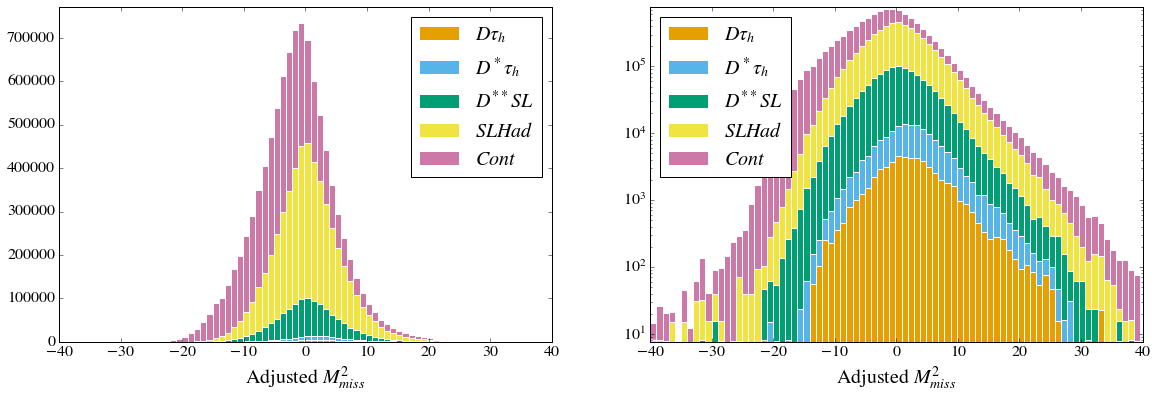

In [6]:
X_cut = apply_cut(X, 'mmiss2prime', lower=-40, upper=40)

fig = plt.figure(figsize=(12*1.618, 6))

ax = fig.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'mmiss2prime', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['mmiss2prime'],
        legend_names=legend_names,
        legend=True)

ax = fig.add_subplot(122)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'mmiss2prime', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['mmiss2prime'],
        legend_names=legend_names,
        legend=True)

if save_pdf: pp.savefig()

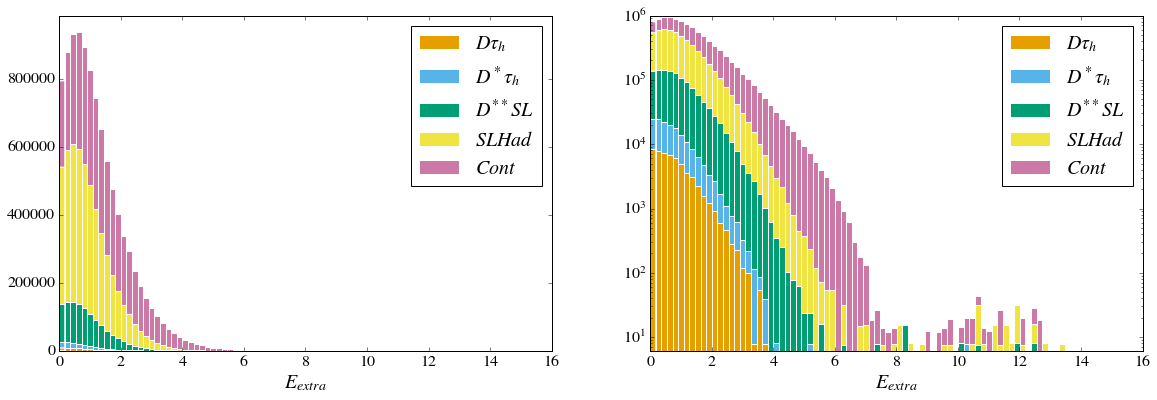

In [7]:
X_cut = apply_cut(X, 'eextra')

fig = plt.figure(figsize=(12*1.618, 6))

ax = fig.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'eextra', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['eextra'],
        legend_names=legend_names,
        legend=True)

ax = fig.add_subplot(122)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'eextra', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['eextra'],
        legend_names=legend_names,
        legend=True)

if save_pdf: pp.savefig()

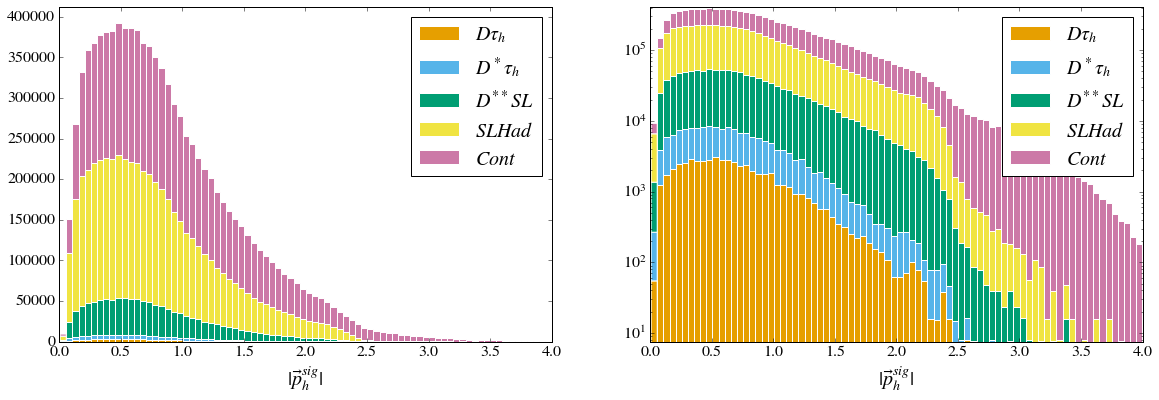

In [8]:
X_cut = apply_cut(X, 'sig_hp3', upper=4)

fig = plt.figure(figsize=(12*1.618, 6))

ax = fig.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'sig_hp3', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['sig_hp3'],
        legend_names=legend_names,
        legend=True)

ax = fig.add_subplot(122)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'sig_hp3', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['sig_hp3'],
        legend_names=legend_names,
        legend=True)

if save_pdf: pp.savefig()

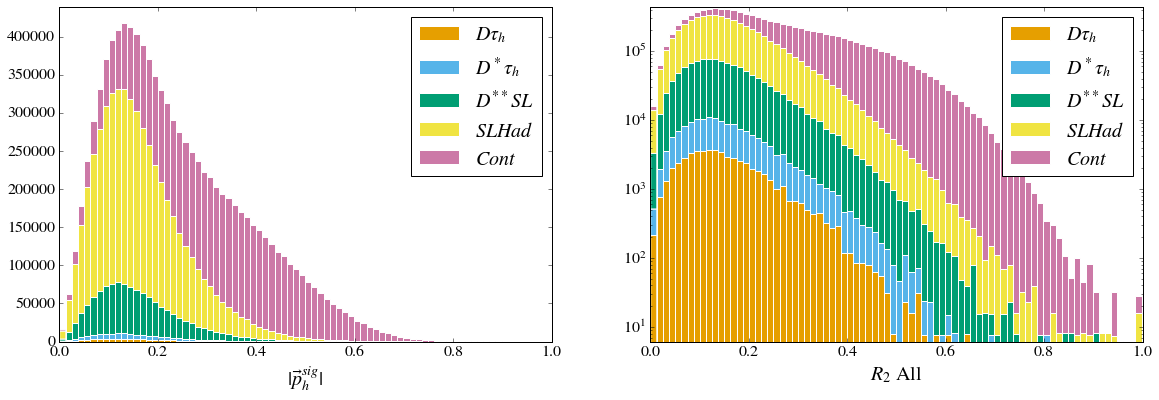

In [9]:
X_cut = apply_cut(X, 'r2all')

fig = plt.figure(figsize=(12*1.618, 6))

ax = fig.add_subplot(121)
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'r2all', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['sig_hp3'],
        legend_names=legend_names,
        legend=True)

ax = fig.add_subplot(122)
ax.set_yscale('log')
ax.tick_params(axis='both', which='major', labelsize=16)
histRec(X_cut, 'r2all', weights='weight', Y='grouped_dss_evttype', ax=ax, 
        stacked=True, show_hist=True, bins=80, 
        xlabel=typeset_name['r2all'],
        legend_names=legend_names,
        legend=True)

if save_pdf: pp.savefig()

In [10]:
def group_mc_evttype(X):
    mc_evttypes = X['grouped_dss_evttype'].astype(int)
    is_signal = (mc_evttypes == 1) | (mc_evttypes == 2)
    mc_evttypes[is_signal] = 1
    mc_evttypes[~is_signal] = 2
    X['grouped_dss_evttype'] = mc_evttypes
group_mc_evttype(X)

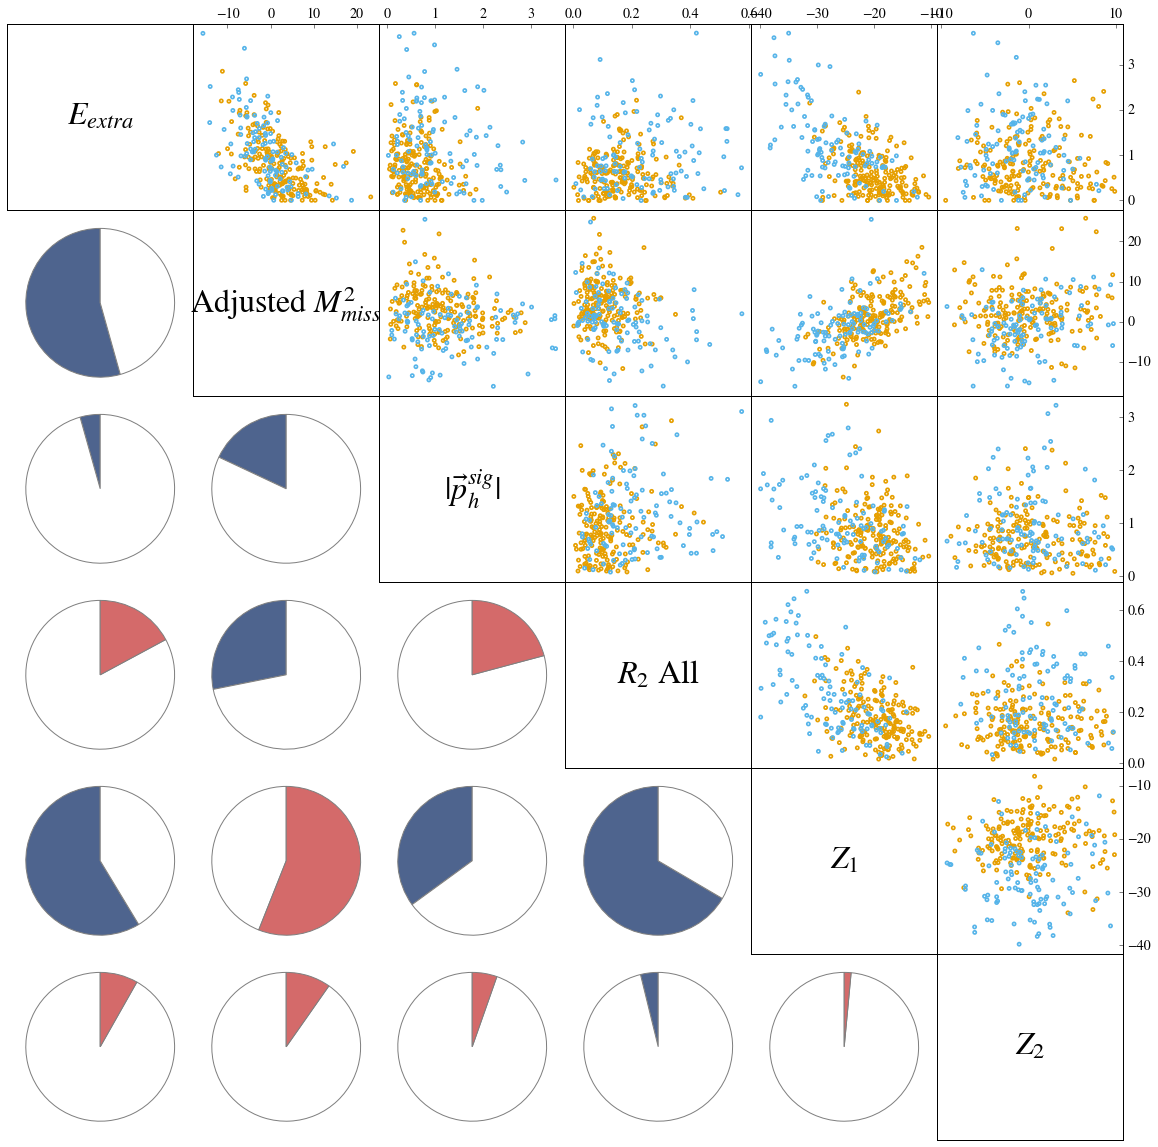

In [11]:
X_cut = apply_cut(X, 'logit_logre_signal_score', lower=-40, upper=40)
X_cut = apply_cut(X_cut, 'logit_logre_dstartau_score', lower=-10, upper=10)


corrgramRec(X_cut, Y='grouped_dss_evttype', 
            fields=corrgram_vars, alias=corrgram_varnames, 
            figsize=(20,20),
            marker_size=10,
            diag_fontsize=32,
            undersample=[0.01, 0.0001]);

if save_pdf: pp.savefig()

In [12]:
if save_pdf: pp.close()